In [1]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import tensorflow as tf

import  warnings
warnings.simplefilter('ignore')


# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Diretório

#### Leitura dos dados

In [2]:
df = pd.read_csv("vendas_varejo_pe.csv", sep=';')

In [3]:
df

,data,Venda
0,jan/00,56
1,fev/00,"54,4"
2,mar/00,"53,6"
3,abr/00,"53,5"
4,mai/00,"57,1"
...,...,...
184,mai/15,"110,6"
185,jun/15,"106,7"
186,jul/15,"106,8"
187,ago/15,"106,7"


In [4]:

# Crie uma função para converter as datas
def convert_data(data_str):
    # Mapeie os nomes dos meses para seus números equivalentes
    meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

    # Divida a string da data em partes
    partes = data_str.split('/')

    # Converta o mês para um número
    mes_num = meses[partes[0].lower()]

    # Adicione o ano e o mês ao novo formato de data
    nova_data = pd.to_datetime(f'20{partes[1]}-{mes_num:02d}')

    return nova_data

# Aplique a função de conversão à coluna 'data'
df['data'] = df['data'].apply(convert_data)

# Agora, 'data' está no formato de data e pode ser usada como índice para uma série temporal
# df.set_index('data', inplace=True)

# Agora você pode estudar a série temporal
print(df)


          data  Venda
0   2000-01-01     56
1   2000-02-01   54,4
2   2000-03-01   53,6
3   2000-04-01   53,5
4   2000-05-01   57,1
..         ...    ...
184 2015-05-01  110,6
185 2015-06-01  106,7
186 2015-07-01  106,8
187 2015-08-01  106,7
188 2015-09-01  100,2

[189 rows x 2 columns]


In [5]:
df.set_index('data', inplace=True)

In [6]:
df.columns = ["target"]

In [7]:
df

,target
data,
2000-01-01,56
2000-02-01,"54,4"
2000-03-01,"53,6"
2000-04-01,"53,5"
2000-05-01,"57,1"
...,...
2015-05-01,"110,6"
2015-06-01,"106,7"
2015-07-01,"106,8"


In [8]:
# Substitua a vírgula por ponto e converta para float
df['target'] = df['target'].str.replace(',', '.').astype(float)


<Axes: xlabel='data'>

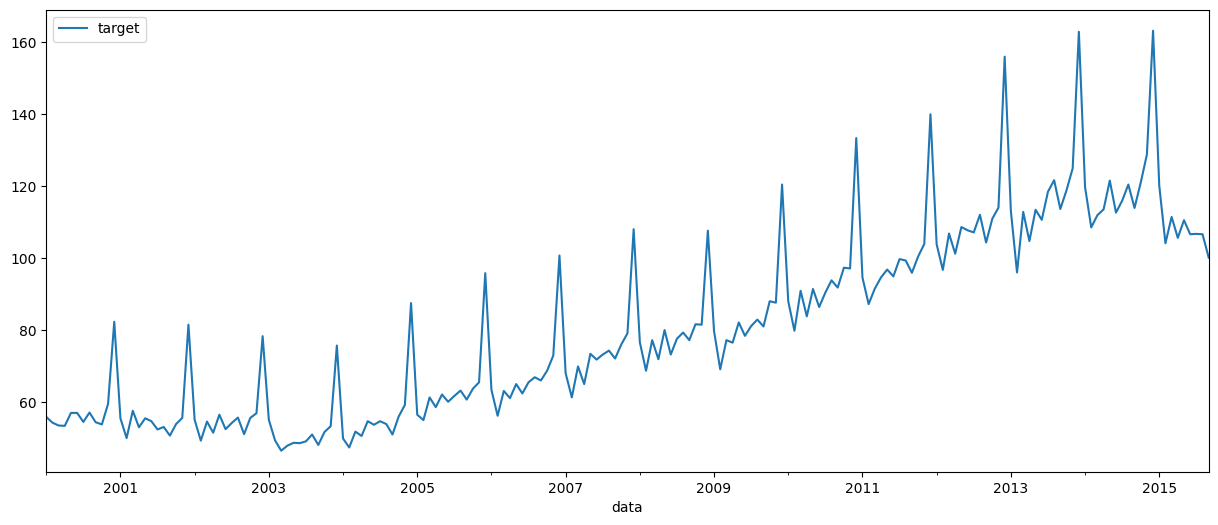

In [9]:
df.plot()

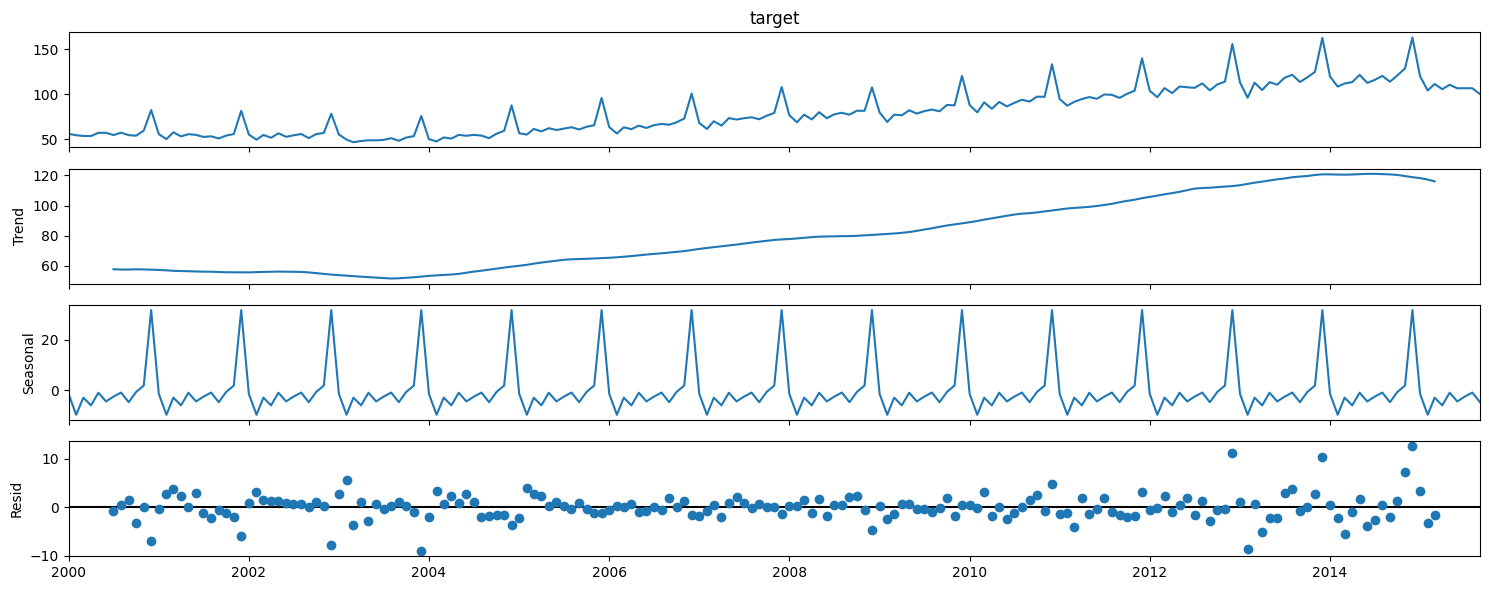

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['target'], period=12)
decompose.plot();

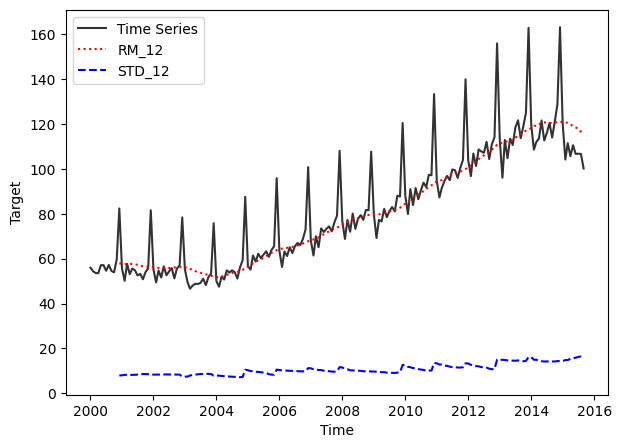

In [22]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(df['target'], color='black', label='Time Series', alpha=0.8)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo')
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df)
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.43


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

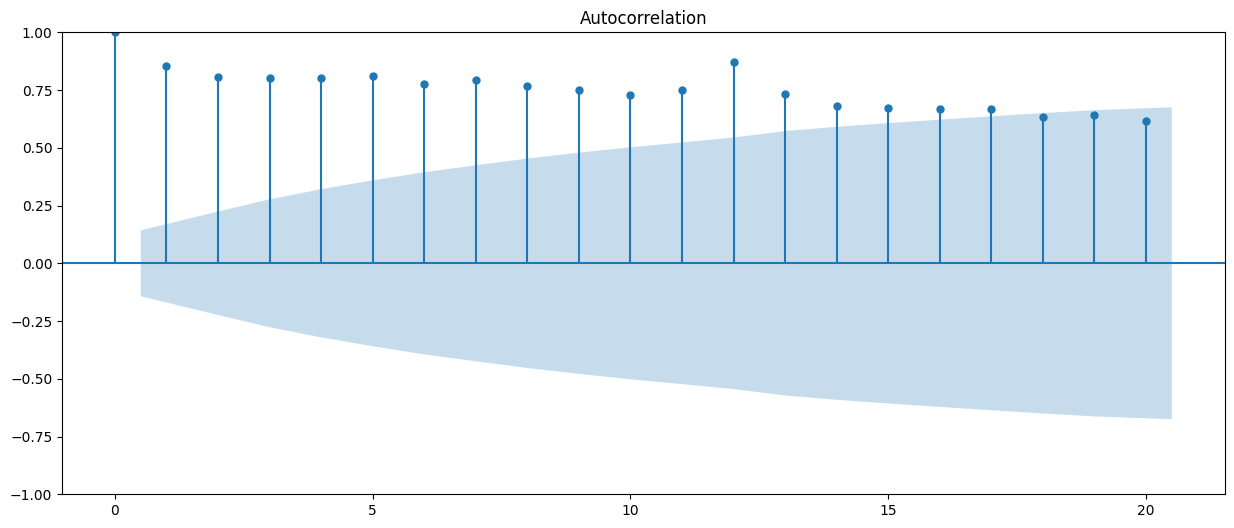

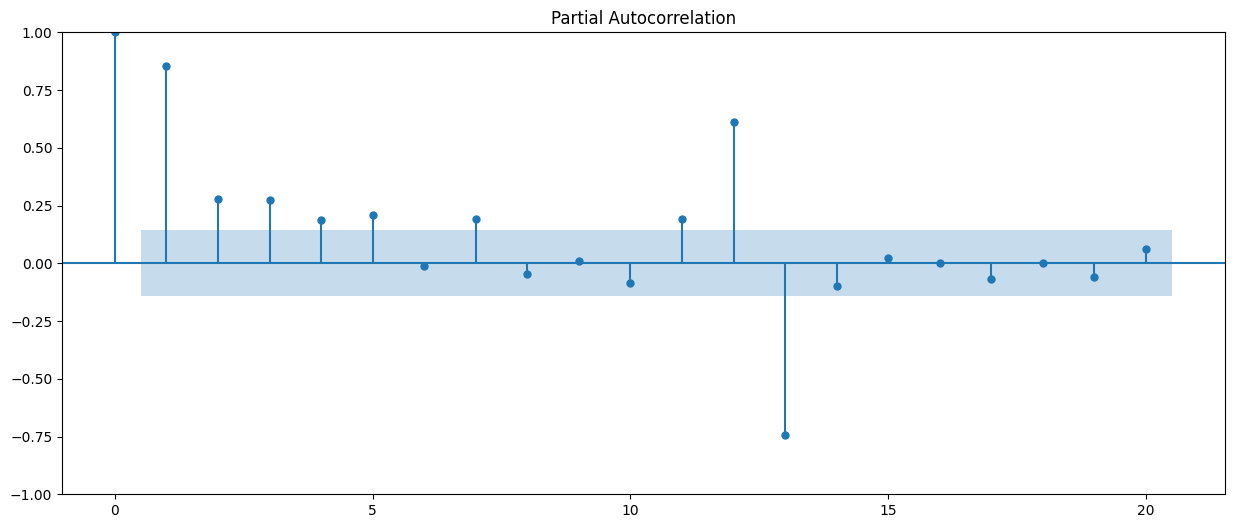

In [13]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
pyplot.show()

In [16]:
serie_diferenciada = df.diff().dropna()


In [17]:

adf = adfuller(serie_diferenciada)
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.75


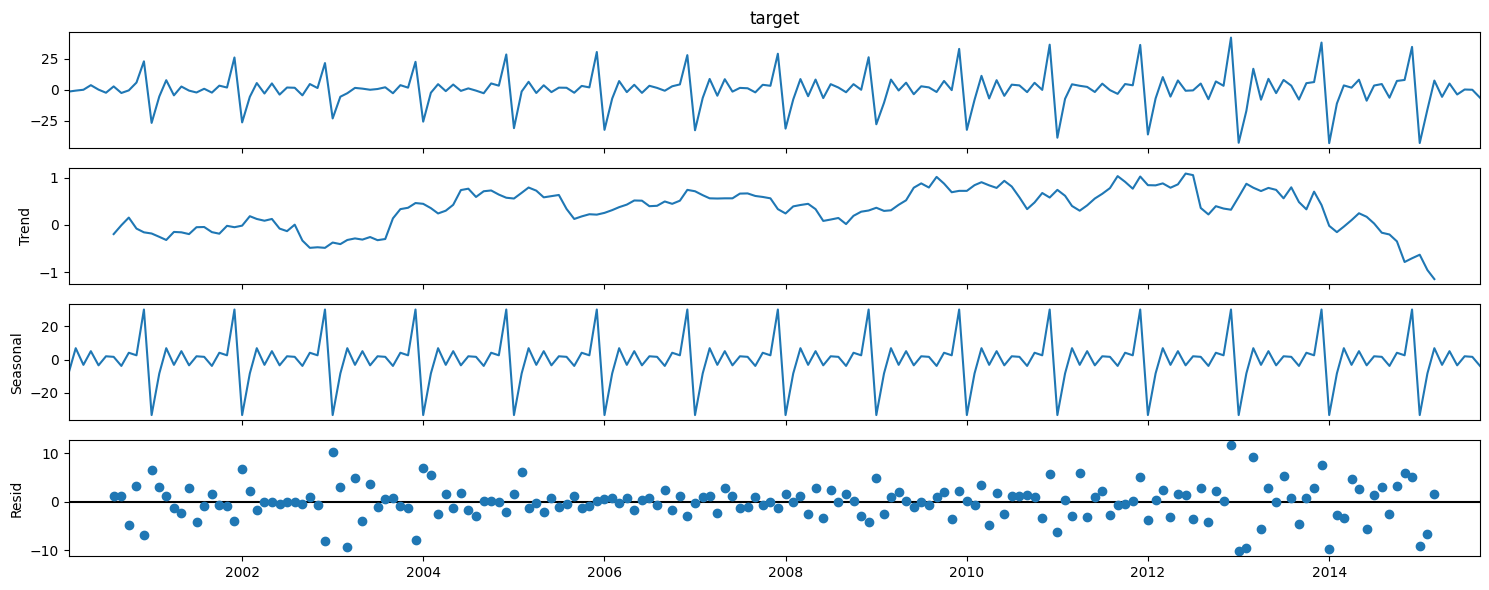

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(serie_diferenciada['target'], period=12)
decompose.plot();

In [19]:
serie_diferenciada1 = serie_diferenciada.diff().dropna()

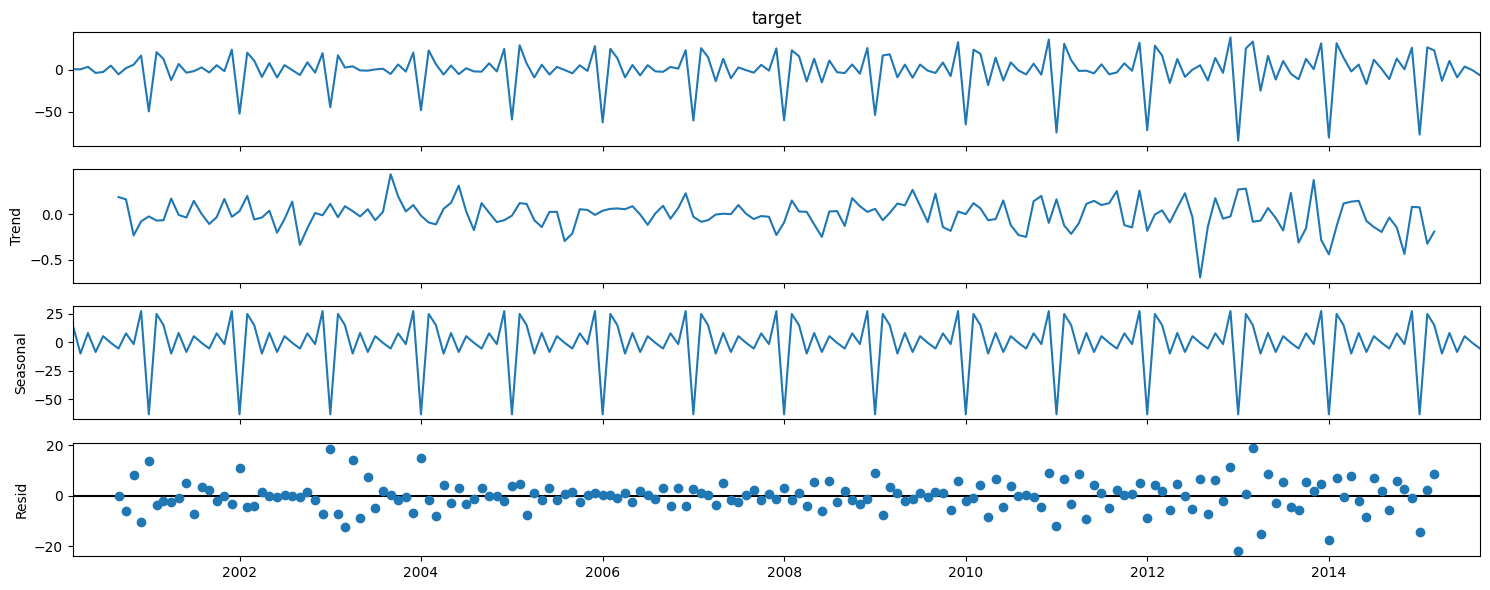

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(serie_diferenciada1['target'], period=12)
decompose.plot();

In [ ]:

adf = adfuller(serie_diferenciada1)
print(f'p-valor: {round(adf[1],2)}')

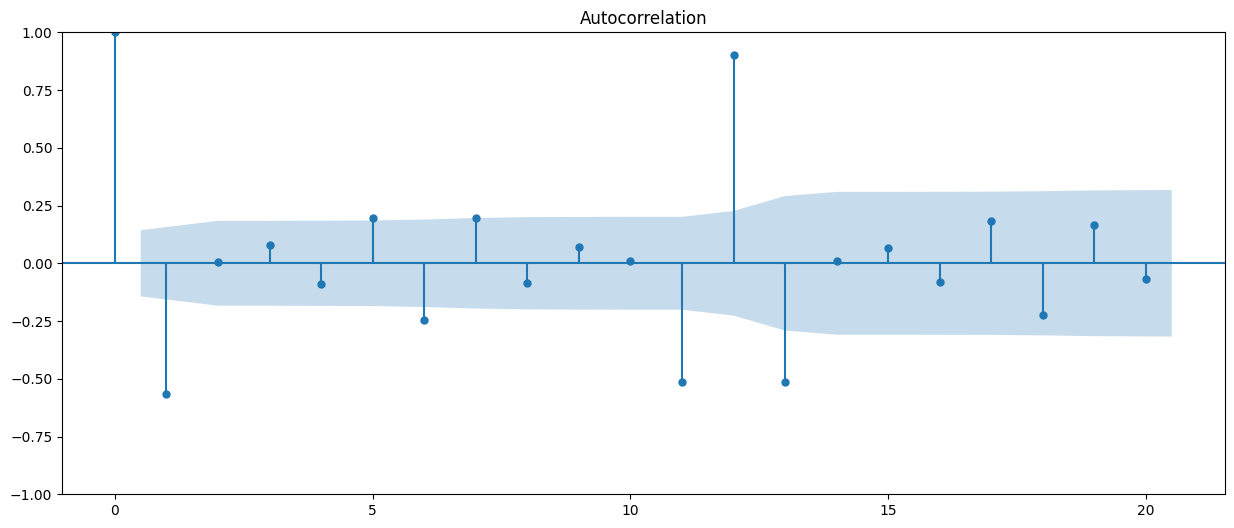

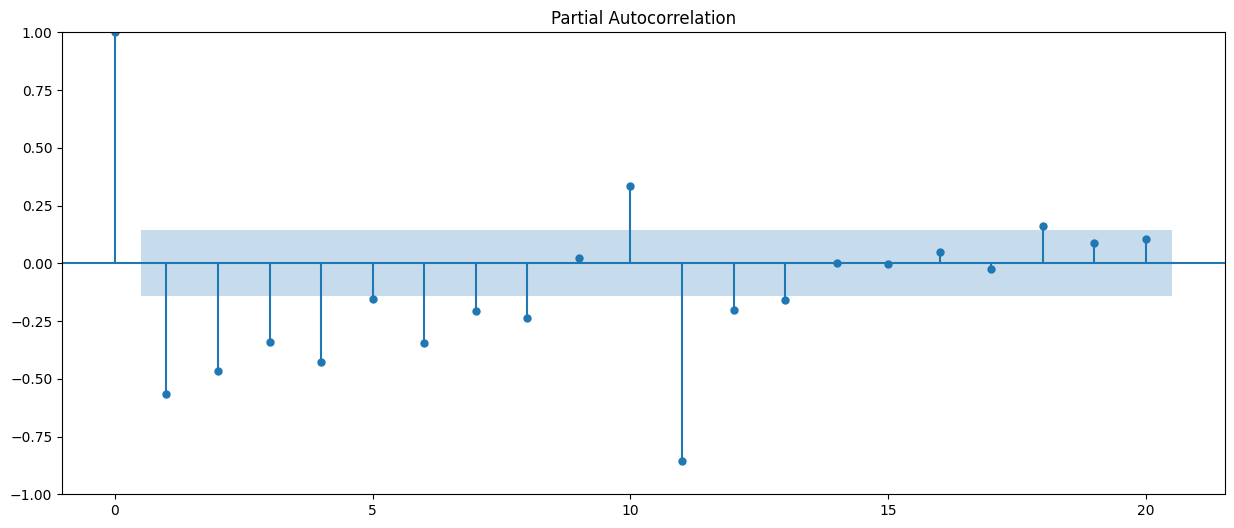

In [22]:
plot_acf(serie_diferenciada1, lags=20)
plot_pacf(serie_diferenciada1, lags=20)
pyplot.show()

Possiveis valores para AR e MA, segundo a metodologia de Box & Jenkins:
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)

Os parâmetros que deram o menor BIC foi (4, 1)

In [70]:
p = 4
d = 2
q = 1

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Suponha que 'sua_serie_temporal' seja sua série temporal original
# e você já tenha ajustado o modelo ARIMA
modelo_arima = ARIMA(df, order=(p, d, q))
resultado_arima = modelo_arima.fit()

print(resultado_arima.summary())




c:\Users\gjque\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gjque\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gjque\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 target   No. Observations:                  189
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -725.818
Date:                Tue, 05 Dec 2023   AIC                           1463.637
Time:                        20:32:18   BIC                           1483.024
Sample:                    01-01-2000   HQIC                          1471.492
                         - 09-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5862      0.073     -8.058      0.000      -0.729      -0.444
ar.L2         -0.5296      0.102     -5.174      0.000      -0.730      -0.329
ar.L3         -0.3619      0.112     -3.232      0.0

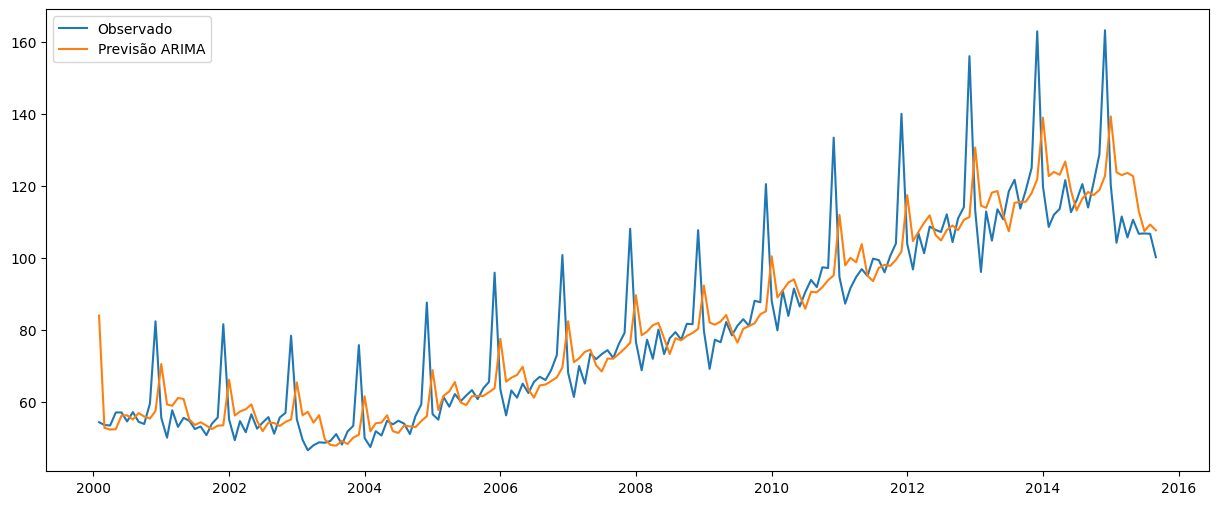

In [75]:
# Obtenha a previsão dentro da amostra
previsao_in_sample_arima = resultado_arima.predict()

# Crie a série temporal ajustada
fitted_arima = pd.Series(previsao_in_sample_arima.values, index=df.index)

# Plote os resultados
fig, ax = plt.subplots()
ax.plot(df.iloc[1:], label='Observado')
ax.plot(fitted_arima.iloc[1:], label='Previsão ARIMA')
plt.legend()
plt.show()

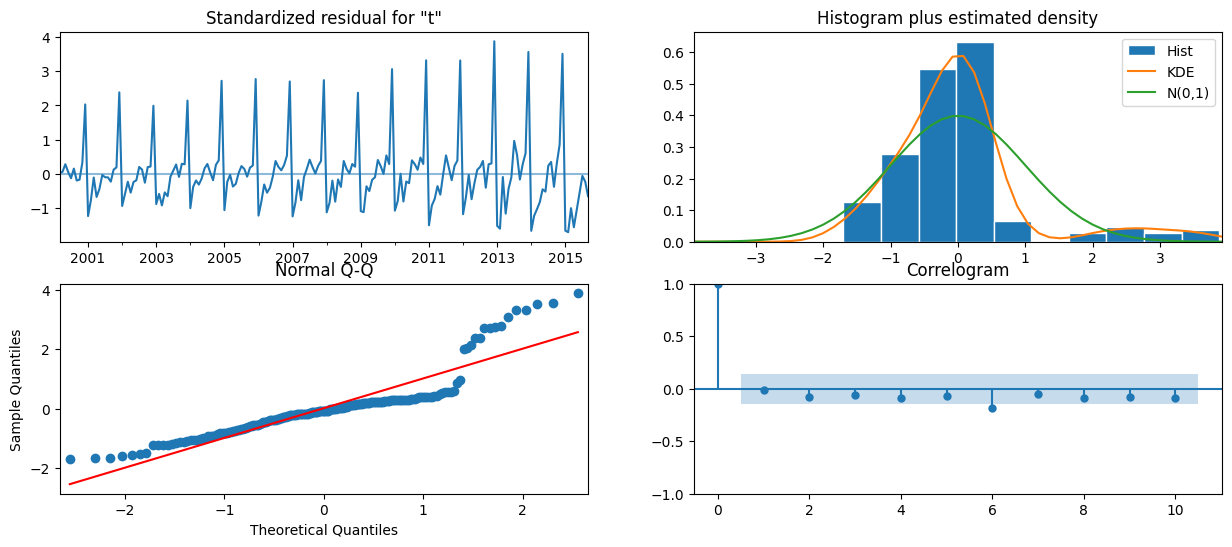

In [77]:
resultado_arima.plot_diagnostics();

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('ARIMA model Results')
print('r2', round(r2_score(df.iloc[1:], fitted_arima.iloc[1:]),2))
print('mse', round(mean_squared_error(df.iloc[1:], fitted_arima.iloc[1:]),2))
print('mae', round(mean_absolute_error(df.iloc[1:], fitted_arima.iloc[1:]),2))

ARIMA model Results
r2 0.79
mse 138.08
mae 7.57


##### Split - Treinamento e teste

141 48


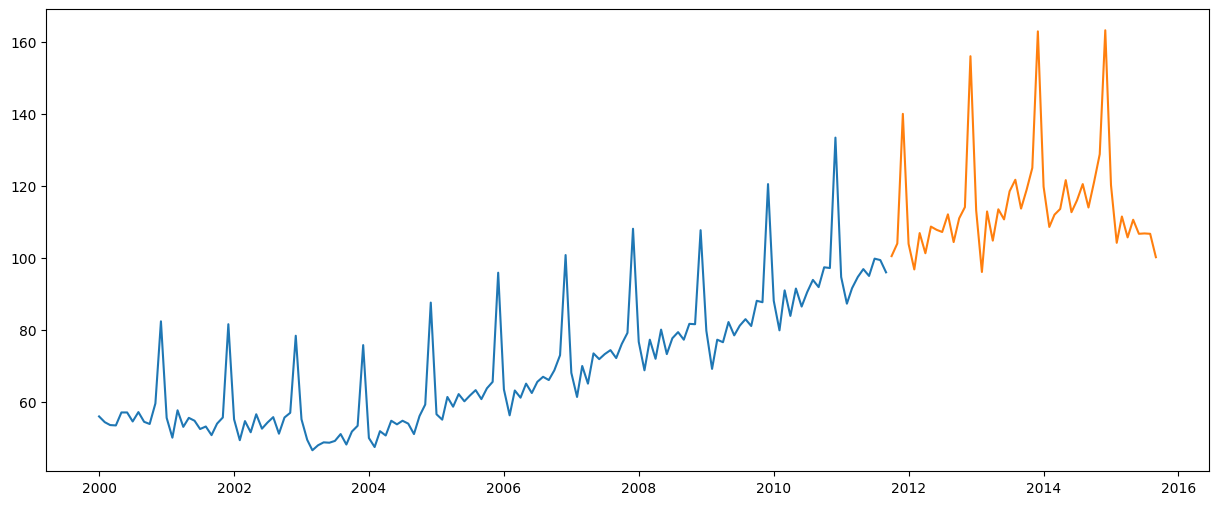

In [32]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))
plt.plot(train); plt.plot(test)

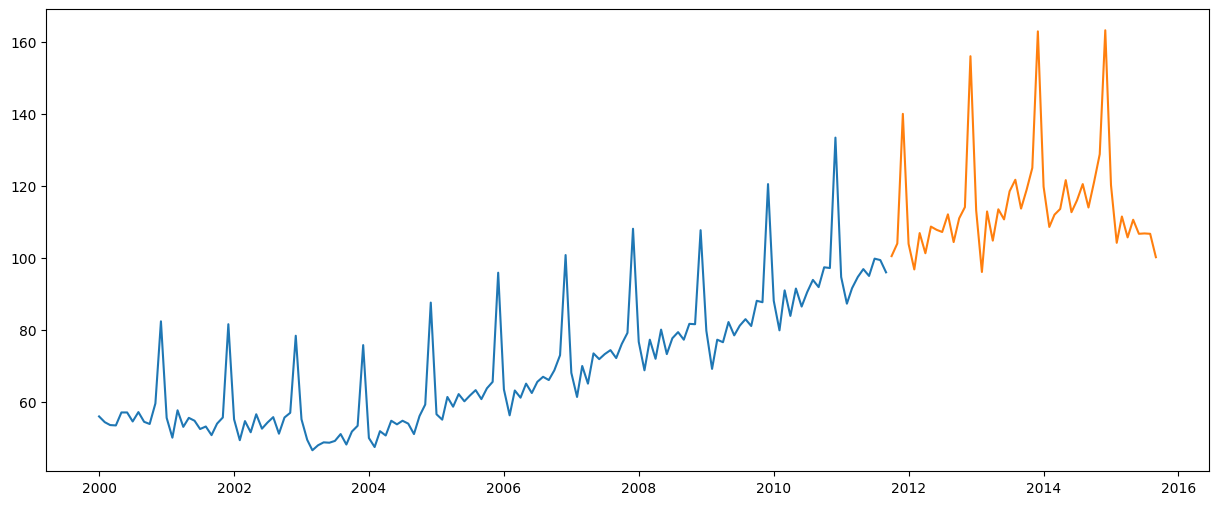

In [79]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, shuffle=False)
plt.plot(train); plt.plot(test)

# shufflebool, default=True: Whether or not to shuffle the data before splitting.

##### Normalização MinMax [0, 1]

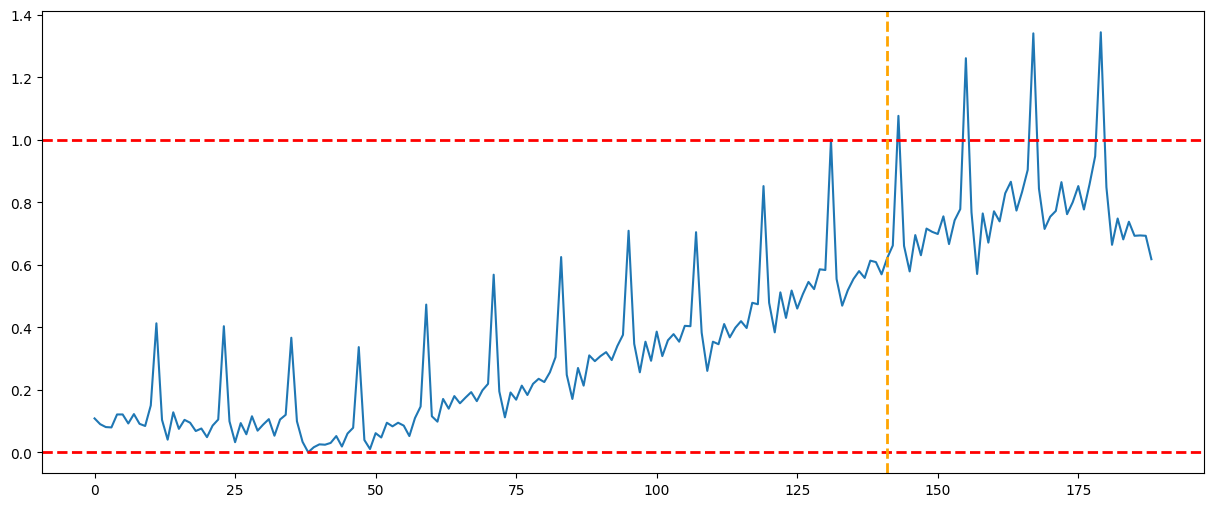

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)  # fit considerando o conjunto de treinamento
train_norm = scaler.transform(train)
test_norm = scaler.transform(test)
#plt.plot(train_norm)
plt.plot(np.concatenate([train_norm, test_norm]))
plt.axhline(y=1.0, c="r", linewidth=2, linestyle = '--')
plt.axhline(y=0.0, c="r", linewidth=2, linestyle = '--')
plt.axvline(x=len(train), c="orange", linewidth=2, linestyle = '--')

#### LSTM

In [81]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1
generatorTrain = TimeseriesGenerator(np.array(train_norm), np.array(train_norm), length=n_input, batch_size=1)
generatorTest = TimeseriesGenerator(np.array(test_norm), np.array(test_norm), length=n_input, batch_size=1)

#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator

In [82]:
#generatorTrain[0]
print(test_norm[0:13])
generatorTest[0]

[[0.62096774]
 [0.66129032]
 [1.07603687]
 [0.66013825]
 [0.57834101]
 [0.69470046]
 [0.63018433]
 [0.71543779]
 [0.70506912]
 [0.69815668]
 [0.75460829]
 [0.66589862]
 [0.74193548]]


(array([[[0.62096774],
         [0.66129032],
         [1.07603687],
         [0.66013825],
         [0.57834101],
         [0.69470046],
         [0.63018433],
         [0.71543779],
         [0.70506912],
         [0.69815668],
         [0.75460829],
         [0.66589862]]]),
 array([[0.74193548]]))

#### Vanilla LSTM

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [84]:
epochs = 100
n_neurons = 250
act_function = 'relu'
optimizer = 'adam'
loss = 'mse'

# Definindo modelo
tf.random.set_seed(42)
lstm_model = Sequential()
lstm_model.add(LSTM(n_neurons, activation=act_function, input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))

# Fit do modelo
lstm_model.compile(optimizer=optimizer, loss=loss)
lstm_model.fit(generatorTrain, epochs=epochs, batch_size=1, shuffle=False)

Epoch 1/100
129/129 [==============================] - 6s 29ms/step - loss: 0.0145
Epoch 2/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0144
Epoch 3/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0138
Epoch 4/100
129/129 [==============================] - 4s 28ms/step - loss: 0.0108
Epoch 5/100
129/129 [==============================] - 4s 28ms/step - loss: 0.0063
Epoch 6/100
129/129 [==============================] - 4s 28ms/step - loss: 0.0041
Epoch 7/100
129/129 [==============================] - 4s 28ms/step - loss: 0.0036
Epoch 8/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0033
Epoch 9/100
129/129 [==============================] - 4s 28ms/step - loss: 0.0030
Epoch 10/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0025
Epoch 11/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0022
Epoch 12/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0022
E

36/36 [==============================] - 0s 7ms/step


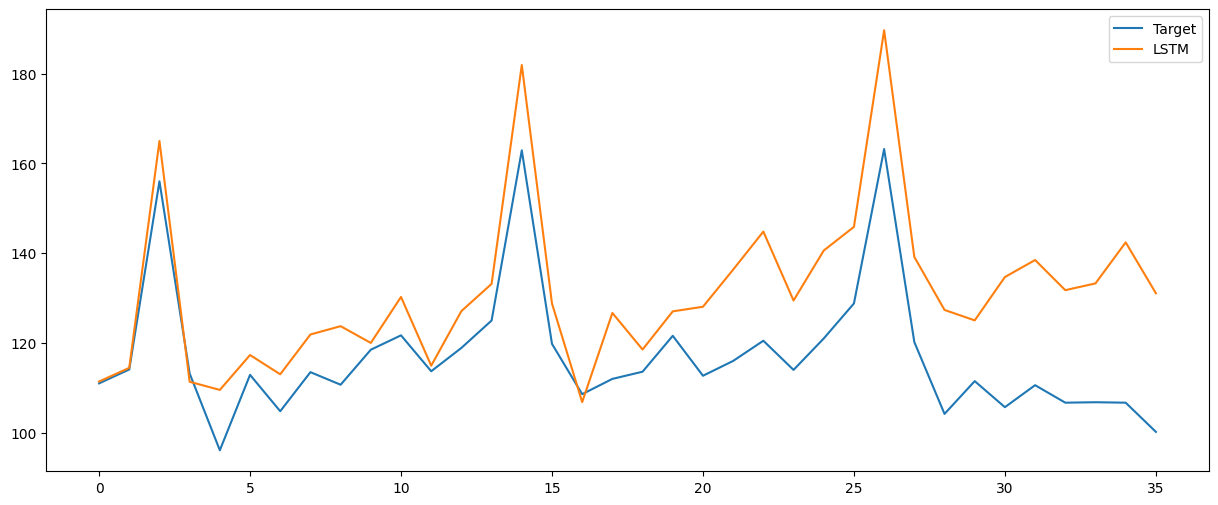

In [85]:
pred = lstm_model.predict(generatorTest)

predictions_actual = scaler.inverse_transform(pred)
test_target_actual = np.array(test[(n_input):])

predictions_actual = predictions_actual.flatten()
test_target_actual = test_target_actual.flatten()
results_df = pd.DataFrame({'Target': test_target_actual, 'LSTM': predictions_actual})

plt.plot(test_target_actual, label="Target")
plt.plot(predictions_actual, label="LSTM")
plt.legend()

In [86]:
results_df = pd.DataFrame()
results_df['Target'] = test_target_actual.tolist()
results_df['LSTM'] = predictions_actual.tolist()
results_df.to_csv('lstm_results.csv', index=False)
#results_df.head()

In [87]:
from sklearn.metrics import median_absolute_error, mean_squared_error

results = {}
print('LSTM results')
results['LSTM'] = {'rmse': round(mean_squared_error(test_target_actual, predictions_actual, squared=False), 2),
                  'mae': round(median_absolute_error(test_target_actual, predictions_actual), 2)}

pd.DataFrame(results)

LSTM results


,LSTM
mae,13.49
rmse,17.18


#LSTM Stacked

In [88]:
# Definindo os modelos

def vanilla_lstm(n_neurons, act_function, n_input, n_features):
    tf.random.set_seed(42)
    lstm_model = tf.keras.Sequential()
    lstm_model.add(tf.keras.layers.LSTM(n_neurons, activation=act_function, return_sequences=True, input_shape=(n_input, n_features)))
    lstm_model.add(tf.keras.layers.Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')
    return lstm_model


def stacked_lstm(n_neurons, act_function, n_input, n_features):
    tf.random.set_seed(42)
    lstm_model = tf.keras.Sequential()
    lstm_model.add(tf.keras.layers.LSTM(n_neurons, activation=act_function, return_sequences=True, input_shape=(n_input, n_features)))
    lstm_model.add(tf.keras.layers.LSTM(n_neurons, activation=act_function))
    lstm_model.add(tf.keras.layers.Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')
    return lstm_model

In [89]:
class EarlyStoppingMSE(tf.keras.callbacks.Callback):
    def __init__(self, monitor='val_loss', patience=10):
        super(EarlyStoppingMSE, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.best_loss = float('inf')
        self.wait = 0
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get(self.monitor)
        if current_loss is None:
            return
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f'\nEarly stopping due to lack of improvement on {self.monitor}...')
                self.model.stop_training = True

class LossHistoryMSE(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossHistoryMSE, self).__init__()
        self.losses = []
    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))

In [90]:
# definindo os callbacks os modelos
early_stopping = EarlyStoppingMSE(patience=5)
loss_history_vanilla = LossHistoryMSE()
loss_history_stacked = LossHistoryMSE()

In [91]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1


In [92]:
epochs = 100
n_neurons = 250
act_function = 'relu'
optimizer = 'adam'
loss = 'mse'


vanilla = vanilla_lstm(n_neurons, act_function, n_input, n_features)
display(vanilla.summary())

stacked = stacked_lstm(n_neurons, act_function, n_input, n_features)
stacked.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 12, 250)           252000    
                                                                 
 dense_1 (Dense)             (None, 12, 1)             251       
                                                                 
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


None

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 250)           252000    
                                                                 
 lstm_3 (LSTM)               (None, 250)               501000    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


141 48


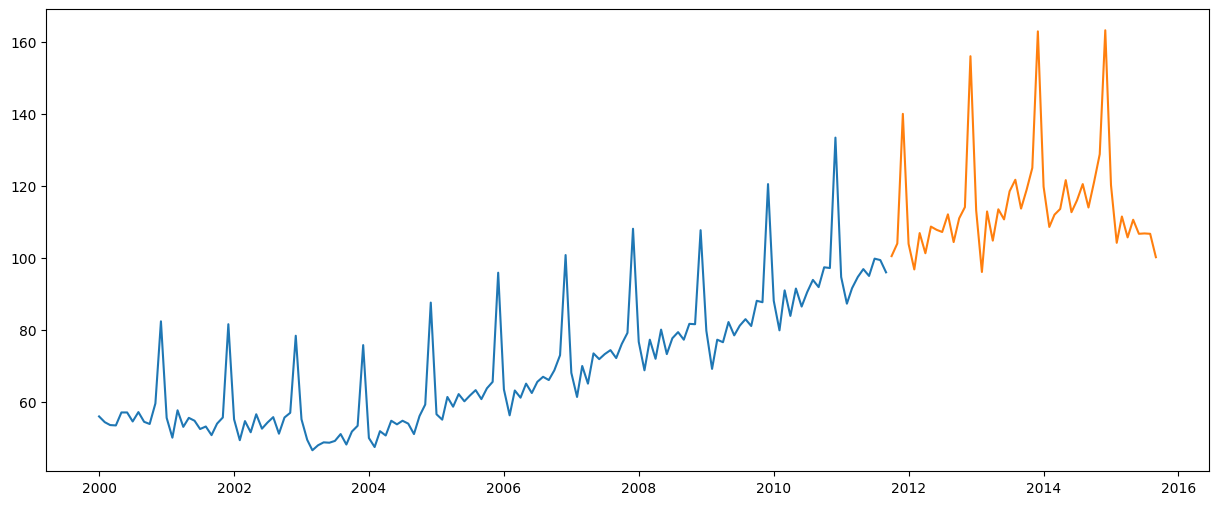

In [93]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))
plt.plot(train); plt.plot(test)
plt.savefig('figura3.png')

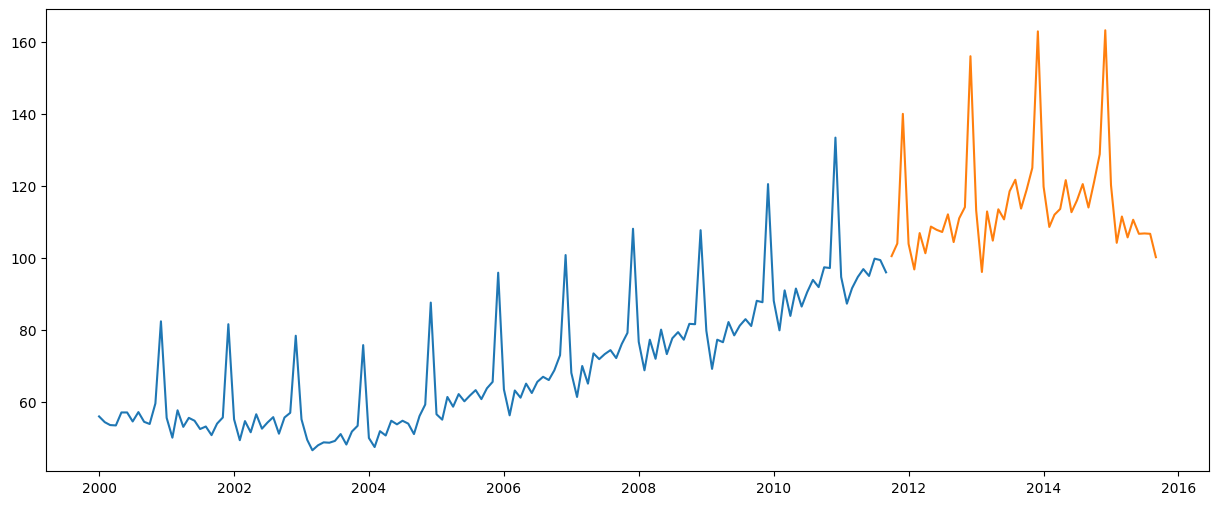

In [94]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, shuffle=False)
plt.plot(train); plt.plot(test)

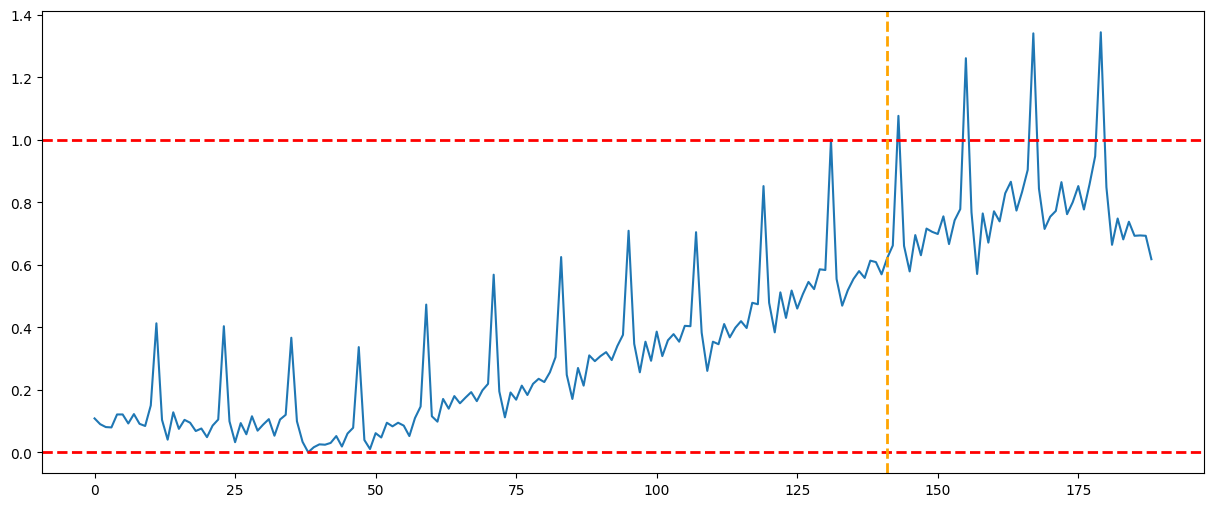

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)  # fit considerando o conjunto de treinamento
train_norm = scaler.transform(train)
test_norm = scaler.transform(test)
#plt.plot(train_norm)
plt.plot(np.concatenate([train_norm, test_norm]))
plt.axhline(y=1.0, c="r", linewidth=2, linestyle = '--')
plt.axhline(y=0.0, c="r", linewidth=2, linestyle = '--')
plt.axvline(x=len(train), c="orange", linewidth=2, linestyle = '--')

In [96]:
generatorTrain = TimeseriesGenerator(np.array(train_norm), np.array(train_norm), length=n_input, batch_size=1)
generatorTest = TimeseriesGenerator(np.array(test_norm), np.array(test_norm), length=n_input, batch_size=1)

In [97]:
# Fit do modelo

#vanilla.compile(optimizer=optimizer, loss=loss)
#vanilla.fit(generatorTrain, epochs=epochs, batch_size=1, shuffle=False, callbacks=[early_stopping, loss_history_stacked])



stacked.compile(optimizer=optimizer, loss=loss)
stacked.fit(generatorTrain, epochs=epochs, batch_size=1, shuffle=False, callbacks=[early_stopping, loss_history_stacked])


Epoch 1/100
129/129 [==============================] - 10s 65ms/step - loss: 0.0161
Epoch 2/100
129/129 [==============================] - 8s 65ms/step - loss: 0.0157
Epoch 3/100
129/129 [==============================] - 9s 67ms/step - loss: 0.0151
Epoch 4/100
129/129 [==============================] - 9s 71ms/step - loss: 0.0151
Epoch 5/100
129/129 [==============================] - 9s 68ms/step - loss: 0.0135
Epoch 6/100
129/129 [==============================] - 9s 66ms/step - loss: 0.0125
Epoch 7/100
129/129 [==============================] - 8s 64ms/step - loss: 0.0166
Epoch 8/100
129/129 [==============================] - 8s 64ms/step - loss: 0.0131
Epoch 9/100
129/129 [==============================] - 8s 62ms/step - loss: 0.0155
Epoch 10/100
129/129 [==============================] - 8s 60ms/step - loss: 0.0101
Epoch 11/100
129/129 [==============================] - 8s 61ms/step - loss: 0.0070
Epoch 12/100
129/129 [==============================] - 8s 61ms/step - loss: 0.0045


36/36 [==============================] - 1s 14ms/step


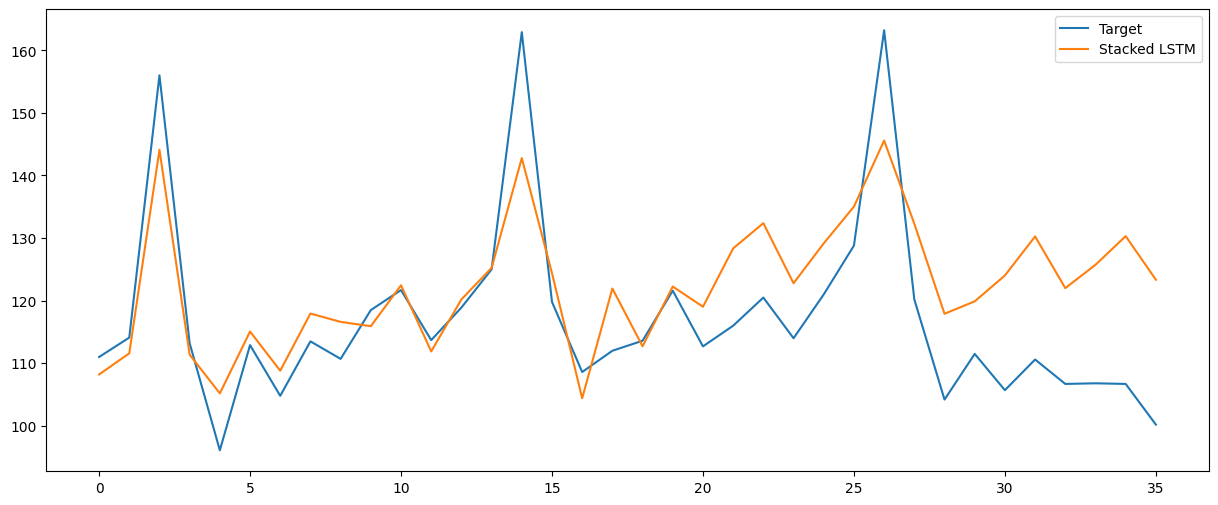

In [99]:
pred_stacked = stacked.predict(generatorTest)

predictions_actual_stacked = scaler.inverse_transform(pred_stacked)
test_target_actual_stacked = np.array(test[(n_input):])
#results_df = pd.DataFrame([test_target_actual, predictions_actual])

plt.plot(test_target_actual_stacked, label="Target")
plt.plot(predictions_actual_stacked, label="Stacked LSTM")
plt.legend()
plt.savefig('figura7.png')

***Links***:

TS Prediction with LSTM Recurrent Neural Networks in Python with Keras: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Recurrent Neural Network (RNN), Long-Short Term Memory (LSTM) & Gated Recurrent Unit (GRU): http://dprogrammer.org/rnn-lstm-gru

Multivariate Time Series Forecasting with LSTMs in Keras: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Multistep Time Series Forecasting with LSTMs in Python: https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/